<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de Procesos Financieros. 

**Nombres:** Diego Alberto López Lazareno (Estudiante 1) y Esteban Márquez Delgado (Estudiante 2).

**Fecha:** 14 de octubre del 2021.

**Expediente** : IF722100, IF700637.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/diegolazareno/Proyecto_DALopez_EMarquez

# Proyecto TEMA-2

# 1.1 Valuación Intrínseca Probabilista:
## O Cómo Valorar Empresas Financieras Con Simulación Montecarlo

## 1.2 Objetivos

### 1.2.1 Objetivo General

+ Obtener una distribución de probabilidad para el valor intrínseco de las empresas financieras que forman parte del índice S&P $500$.

### 1.2.2 Objetivos Específicos

+ Descargar, con ayuda de la API de Financial Modeling Prep, los fundamentales históricos de las empresas del sector financiero que están listadas en el índice S&P $500$.
+ Obtener la distribución de probabilidad de cada nodo que simularemos a través de la manipulación aritmética de los fundamentales históricos descargados.
+ Generar variables aleatorias que sigan la distribución de probabilidad de su respectivo nodo con las técnicas aprendidas durante el presente curso de *Simulación de Procesos Financieros*.
+ Valorar a determinada(s) empresa(s) del sector financiero a través del *Modelo de Dividendos Descontados*, usando como parámetros de dicho método de valuación intrínseca a las variables aleatorias generadas de cada nodo. Este proceso nos arrojará una distribución de probabilidad para el valor intrínseco de la firma en cuestión.
+ Interpretar los resultados obtenidos en el punto anterior.


## 1.3 Definición

### 1.3.1 Escenario

Se modelará la valoración de acciones de empresas que pertenecen al sector financiero a través del **Modelo de Dividendos Descontados**. Esta técnica de valoración consiste en descontar o *traer a valor presente* los futuros flujos de efectivo, en este caso los dividendos, que se esperan obtener por la tenencia de una acción. El descuento de dichos flujos de efectivo esperados se conoce como **valor intrínseco**: esto representa la cantidad máxima que debería pagar un inversor por una participación en un negocio si considera a sus pronósticos como suficientemente certeros. 

Como se mencionó, es a través del Modelo de Dividendos Descontados que se puede conocer el valor intrínseco de un negocio, o bien, de sus acciones, pues éstas representan una participación dentro del mismo. Tal modelo suele ser empleado para valorar empresas que pertenecen al sector financiero, por lo que en este proyecto se valorarán únicamente empresas financieras (bancos comerciales, aseguradoras, bancos de inversión, etc.) que pertenezcan al índice S&P $500$ (actualmente son cerca de $65$ empresas). Lo interesante de esta técnica de valoración es que necesita de varias entradas (inputs) para pronosticar el crecimiento de los dividendos y su posterior descuento. Aquí es donde entran las herramientas que hemos aprendido durante el curso: tomaremos de una base de datos, [Financial Modeling Prep](https://financialmodelingprep.com/developer/docs), los fundamentales de estas empresas financieras durante varios ejercicios fiscales para simular los distintos nodos que consideramos necesarios; de esta forma estamos llevando la valoración fundamental a un terreno probabilista, donde las distribuciones de características de las demás firmas servirán como entradas (inputs) para el modelo. 

Lo que buscamos con lo anteriormente descrito es obtener una distribución de probabilidad que refleje el valor intrínseco de una acción para distintos escenarios, donde en cada uno de estos los fundamentales del negocio cambiarán al largo plazo (en torno al año $5$ de valoración); adquiriendo así características de otras firmas, dadas por la distribución de probabilidad de fundamentales del conjunto de firmas que pertenecen al sector financiero. La principal motivación de esta aventura es que como inversores nos es más útil una distribución de probabilidad para el valor intrínseco de un activo, ya que de esta forma se captura la incertidumbre del mundo cambiante en el que estas empresas desenvuelven sus operaciones.

### 1.3.2 Diagrama

<img src = "Diagrama.png" width = "802px" height = "395px">

## 1.4 Nodos


El **Modelo de Dividendos Descontados** necesita de proyecciones, en específico para los dividendos que se esperan obtener por la tenencia de una acción. Las firmas financieras suelen pagar dividendos a sus accionistas, por lo que este modelo nos es útil para determinar un valor intrínseco para tales empresas. Para llegar a los dividendos que se reparten a los accionistas hay que empezar por pronosticar las ventas de la empresa. Una vez hecho esto se deben conocer los ingresos netos que tendrá la empresa, para esto es útil el margen de beneficio neto; nuestro primer nodo a simular:

### 1.4.1 Margen De Beneficio Neto 

El **Margen de Beneficio Neto** es el porcentaje de las ventas que queda a una empresa después de las erogaciones originadas por los costos, pagos de intereses e impuestos. Matemáticamente se define como:

$$ Margen \space de \space Beneficio \space Neto = \frac{Utilidad \space Neta}{Ventas} $$

Con ayuda de la base de datos (que proporciona fundamentales de todas las firmas pertenecientes al sector financiero) obtendremos una distribución de probabilidad para el margen de beneficio neto, de esta forma podremos simular distintos escenarios para la valoración de una firma en específico, donde en un periodo futuro sus fundamentales se desvían hacia alguna variable aleatoria, algún otro margen de beneficio neto, que se encuentre en la distribución de probabilidad. Reflejando así el que una empresa con un amplio margen puede caer en un margen neto mediocre, y viceversa, que una empresa con márgenes mediocres puede gozar en un futuro de jugosos márgenes.

### 1.4.2 Ratio Payout

Una vez se tienen los beneficios netos el consejo de administración decide la repartición de dividendos a los accionistas. El **Ratio Payout** nos ayuda a cuantificar qué proporción de tales ingresos se reparten a los tenedores de acciones. Matemáticamente se define como:

$$ Ratio \space Payout = \frac{Dividendos}{Utilidad \space Neta} $$

A través de la simulación tendremos distintos escenarios para una etapa futura en la valoración, donde el Ratio Payout de cualquier firma se desvía hacia otro Ratio Payout, esto lograría capturar que, dependiendo del ciclo económico, se aumenta o recorta el reparto de dividendos a los accionistas.


### 1.4.3 Precio A Dividendos

El ratio **Precio a Dividendos** es simplemente un múltiplo que indica a un inversor cuánto está pagando por cada unidad de dividendos que se reparten al momento que adquiere una acción. Matemáticamente se define como: 

$$ Precio \space a \space Dividendos = \frac{Precio \space Por \space Acción}{Dividendos \space Por \space Acción} $$

Tal múltiplo nos ayudará a determinar un valor terminal para la acción que estemos valorando. Este nodo es importante porque no podemos seguir pronosticando dividendos perpetuamente, por ello es necesario un valor terminal que refleje el precio hipotético que se obtendría para la acción al final de la valoración. Esto se logra con el producto entre el ratio Precio a Dividendos y el último dividendo estimado.

### 1.4.4 Beta

Una vez hechos los pronósticos es necesario descontarlos a valor presente. Para ello se empleará el modelo $CAPM$, donde uno de sus inputs es la **Beta**, la cual nos ayuda a cuantificar el riesgo sistémico o de mercado. Para nuestros escenarios de valoración descontaremos los flujos de efectivo esperados con distintas tasas, que provendrán de la distribución de probabilidad para las betas de todas las firmas pertenecientes al sector financiero. 

**La suma de todos los dividendos descontados es el valor intrínseco para la firma en cuestión en el escenario de valoración i-ésimo.**


## 1.5 Hipótesis & Supuestos

### 1.5.1 Definición De Hipótesis

> El objetivo último de la valuación de activos financieros para un inversor es tomar ventaja si existe una discrepancia significativa en el precio al que cotiza la acción y su valor intrínseco. Nosotros obtendremos una distribución de probabilidad para el valor intrínseco de determinada compañía, por lo que podemos calcular el valor esperado de tal distribución (su media). Entonces podemos preguntarnos lo siguiente: **¿la media de la distribución de probabilidad del valor intrínseco es igual al último precio de cotización?** Si esto se cumple entonces significaría que el activo está valuado justamente por los mercados, pues cotiza a su valor intrínseco esperado; de lo contrario, si esto no se cumple significaría que hay una ineficiencia, pues el activo no está valuado justamente por los mercados, por lo que podemos tomar una ventaja. Esta pregunta puede traducirse a una prueba de hipótesis, que se formularía de la siguiente manera:
>
>$$ H_o : \mu = S_T $$
>$$ H_a : \mu \neq S_T $$
>
>donde $S_T$ es el último precio de cotización.
>
> Lo que estamos buscando son activos donde se rechace esta hipótesis, es decir, donde exista ineficiencias y los mercados no los estén valuando correctamente.

### 1.5.2 Definición De Supuestos

> 1. Suponemos que se puede determinar un valor intrínseco, al menos lo suficientemente certero, para las firmas pertenecientes al sector financiero a través del Modelo de Dividendos Descontados. 

> 2. A su vez, al emplear estos métodos de valoración, suponemos que los mercados no son completamente eficientes; ya que de serlo no sería necesaria una valoración, pues el precio al que se negocian las acciones reflejaría el valor del negocio a cada momento. 

> 3. Otro gran supuesto es que los fundamentales de cada firma en lo individual podrán experimentar, en un momento futuro, desviaciones importantes hacia los fundamentales de otras firmas, reflejando así los distintos ciclos de negocio: una firma con un éxito extraordinario podría volverse un negocio mediocre, y viceversa, una firma mediocre, con el tiempo, podría volverse un negocio extraordinario. Este supuesto es el que conforma la piedra angular de este proyecto; pues hay que recordar que obtendremos distribuciones de probabilidad con los fundamentales de todas las firmas del sector financiero para llevar a cabo las valoraciones.

> 4. Suponemos que las distribuciones de probabilidad de los nodos que simularemos son independientes entre sí.

## 1.6 Funciones

In [1]:
# Librerías necesarias
# Análisis y manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Optimización
from scipy import optimize

# KDE
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Yfinance
import yfinance as yf

# Temporalidad
import datetime as dt
import time

# Conexión a la API de Financial Modeling Prep
from pyfmpcloud import settings
from pyfmpcloud import company_valuation as cv
api_key = pd.read_csv("Data/apiKey_FMP.csv").iloc[0, 0]
settings.set_apikey(api_key)

# Paquetes de estadística
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as st

# Filtrado de alertas
import warnings
warnings.filterwarnings("ignore")

In [2]:
def dataframeToArray(data : "Datos"):
    """
    dataframeToArray retorna los valores de un DataFrame convertidos a formato array.
    
    *data : datos numéricos.
    """
    
    data = [data.iloc[i, 0] for i in range(len(data))]
    
    return np.array(data)
    
def boxAndHistPlot(data, size, color, title):
    """
    boxAndHistPlot grafica un diagrama de caja y un histograma para los datos numéricos ingresados.
    
    *data : son los datos numéricos.
    *size : tamaño del gráfico, se debe ingresar como una tupla de la forma (ancho, alto).
    *color : color del gráfico.
    *title : título del gráfico.
    
    """

    fig, axes = plt.subplots(1, 2, figsize = size)
    fig.suptitle(title)
    sns.boxplot(x = data, ax = axes[0], color = color)
    sns.histplot(x = data, ax = axes[1], kde = True, color = color);    
    
def logTransformation(data : "Datos"):
    """
    logTransformation efectúa una transformación logarítmica a los datos ingresados para tratar de reducir su sesgo.

    *data : son los datos a transformar.

    """

    return np.log(data)

def kde(data : "Datos", bw : "Bandwidth", kfolds : "K-folds", x_grid : "Dominio", title : "Título del gráfico", 
        color : "Color del gráfico"):
    """
    kde retorna la función de densidad de probabilidad óptima (PDF) estimada para cualquier conjunto de datos numéricos.
      
    *data : son los datos numéricos.
    *bw : es el espacio de búsqueda propuesto para encontrar la línea de suavizado óptimo, 
    se debe ingresar como: np.linspace(bandwidth mínimo, bandwidth máximo, número de bandwidths entre el mínimo y máximo).
    *kfolds : número de particiones para la optimización del modelo.
    *x_grid : es el dominio de los datos, se debe ingresar como: np.arange(dato mínimo, dato máximo, paso).
    *title : es el título del gráfico.
    *color : son los colores del gráfico, se debe ingresar como: [color 1, color 2].
    
    """
    
    model = GridSearchCV(KernelDensity(), {'bandwidth': bw}, cv = kfolds) 
    model.fit(data[:, None])
    
    bestModel = model.best_estimator_
    pdf = lambda x : np.exp(bestModel.score_samples(x[:, None]))
    
    bwOpt = bestModel.bandwidth
    plt.figure(figsize = (10, 5))
    plt.title(title)
    plt.plot(x_grid, pdf(x_grid), label = "Bandwidth Óptimo : " + str(round(bwOpt, 2)), color = color[0])
    plt.hist(data, 100, fc = color[1], histtype = "stepfilled", alpha = 0.25, density = True)
    plt.legend(loc = "best");

    return pdf 

def f_max(f : "Función de densidad f(x)"):
    """
    f_max maximiza la función de densidad f(x) y retorna t(x), una función anónima con el máximo de f(x).
    
    *f : es la función de densidad f(x).
    
    """
    
    max_f = f(optimize.fmin(lambda x : -f(x), 0, disp=False))
    t = lambda x : np.ones(len(x)) * max_f
    return t

def acceptanceRejection(f : "Función de densidad f(x)", t : "Función que mayora a f(x)", interval : "Dominio de f(x)", 
                        N : "Número de variables aleatorias que se desean aceptar", 
                        method : "Ingrese el método: Montecarlo, Muestreo estratificado, Números aleatorios complementarios"):
    """
    acceptanceRejection retorna:
    x_accepted : una lista que contiene a las variables aleatorias aceptadas.
    
    *f : es la función de densidad f(x) de la cual se desean generar variables aleatorias.
    *t : es una constante que mayora a f(x).
    *interval : es el dominio de la función de densidad f(x), se debe ingresar como una lista de la forma [a, b], donde b > a.
    *N : es el número de variables aleatorias que se desean aceptar. 
    *method : es el método para la generación de las variables aleatorias R2.
    
    """
    x_accepted = []
    
    while len(x_accepted) < (N + 1): 
        R1 = np.random.uniform(interval[0], interval[1], N)
        
        if method == "Montecarlo":
            R2 = np.random.rand(N)
        elif method == "Muestreo estratificado":
            R2 = (np.random.rand(N) + np.arange(0, N)) / N
        else:
            U = np.random.rand(int(N / 2))
            R2 = np.concatenate((U, 1 - U))
                
        datan = pd.DataFrame()
        datan["R1"] = R1
        datan["R2"] = R2
        datan["f_x"] = f(datan["R1"].values)
        datan["t_x"] = t(datan["R1"].values)
        datan["condition"] = datan["f_x"] >= datan["R2"] * datan["t_x"]
            
        [x_accepted.append(R1_i) for R1_i in datan[datan["condition"] == True]["R1"].values];
                                    
    return x_accepted[0 : N]
    
def acceptanceRejectionPlot(data : "Datos", x_accepted : "R1", bins : "Número de bins", f : "Función de densidad f(x)", 
                   x_grid : "Dominio", title : "Título del gráfico", size : "Tamaño del gráfico", color : "Color del gráfico"):
    """
    acceptedR1Plot grafica las variables aleatorias R1 aceptadas en un histograma con su respectiva PDF.
    
    *data : son los datos numéricos.
    *x_accepted : es un arreglo con las variables aleatorias R1 aceptadas.
    *bins : es el número de bins para el histograma.
    *f : es la función de densidad f(x).
    *x_grid : es el dominio de f(x), se debe ingresar como: np.arange(dato mínimo, dato máximo, paso).
    *title : es el título del gráfico.
    *size : es el tamaño del gráfico, se debe ingresar como una tupla de la forma (ancho, alto).
    *color : son los colores del gráfico, se debe ingresar como: [color 1, color 2, color 3].
    
    """
    
    plt.figure(figsize = size)
    plt.title(title)
    plt.plot(x_grid, f(x_grid), label = "f(x)", color = color[0])
    plt.hist(data, density = True, bins = bins, label = "Datos", color = color[1])
    plt.hist(x_accepted, density = True, bins = bins, label = "R1", color = color[2], alpha = 0.25)
    plt.legend(loc = "best")

def fittingHypotheticalDistributions(data : "Datos", error : "Seleccione una métrica de error : MSE, MSLE, MAE", 
                                     label = "Etiqueta del gráfico", color = "Color del gráfico", 
                                     title = "Título del gráfico", size = "Tamaño del gráfico"):
    """
    fittingHypotheticalDistributions retorna:
    fitting : un DataFrame que tiene como índice al nombre de las 5 mejores distribuciones hipotéticas ajustadas a los datos
    ingresados así como su error de ajuste. Además entrega un visual que compara el ajuste de las distribuciones a los datos.
    
    *data : son los datos numéricos.
    *error : es el error de ajuste. El usuario puede seleccionar entre: error cuadrado medio (MSE), error logarítmico cuadrado
    medio (MSLE) y error absoluto medio (MAE).
    *label : es la etiqueta del histograma.
    *color : es el color del histograma.
    *title : es el título del gráfico.
    *size : es el tamaño del gráfico, se debe ingresar como una tupla de la forma (ancho, alto).
    
    """
    
    continuousDistributions = [d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))]
    continuousDistributions.remove("levy_stable")
    
    y, x = np.histogram(data, bins = 100, density = True)
    x = x[1 :]
    
    fitting = pd.DataFrame(index = continuousDistributions, columns = [error])
    estimates = {}
    
    plt.figure(figsize = size)
    plt.title(title)
    plt.hist(data, bins = 100, density = True, label = label, alpha = 0.25, color = color)
    plt.legend();
    
    def fittingHypotheticalDistributions_(distribution):
        nonlocal data, x, y, fitting, estimates
        try:
            parameters = getattr(st, distribution).fit(data)
            y_hat = getattr(st, distribution).pdf(x, *parameters)
            estimates[distribution] = y_hat
            
            if error == "MSE":
                fitting.loc[distribution, error] = metrics.mean_squared_error(y, y_hat)
            elif error == "MSLE":
                fitting.loc[distribution, error] = metrics.mean_squared_log_error(y, y_hat)
            else:
                fitting.loc[distribution, error] = metrics.mean_absolute_error(y, y_hat)
        
        except ValueError:
            pass
        
    def fittingHypotheticalDistributionsPlot(distribution):
        nonlocal x, estimates
        plt.plot(x, estimates[distribution], label = distribution)
        plt.legend();

    [fittingHypotheticalDistributions_(distribution) for distribution in continuousDistributions]
    
    fitting = fitting.sort_values([error]).iloc[0 : 5]
    [fittingHypotheticalDistributionsPlot(distribution) for distribution in list(fitting.index)]

    return fitting

def qqPlot(data : "Datos", hypotheticalDistributions : "Distribuciones hipotéticas", size : "Tamaño del gráfico"):
    """
    qqPlot devuelve un gráfico Q-Q (cuantil-cuantil) que compara un conjunto de datos numéricos con las distribuciones
    teóricas ingresadas (estas últimas representan los modelos teóricos óptimos que se obtuvieron en un proceso de ajuste 
    previo a los datos ya mencionados).
    
    *data : son los datos numéricos.
    *hypotheticalDistributions : es un DataFrame que tiene como índice a las distribuciones hipotéticas óptimas ajustadas 
    a los datos en cuestión.
    *size : es el tamaño del gráfico, se debe ingresar como una tupla de la forma (ancho, alto).
    
    """
    
    fig, axes = plt.subplots(len(hypotheticalDistributions), 1, figsize = size)
    fig.tight_layout(pad = 3.0)
    
    def qqPlot_(distribution, i):
        sm.qqplot(data, dist = getattr(st, distribution), line = "q", fit = True, ax = axes[i]); 
        axes[i].set_title(distribution)
    
    [qqPlot_(distribution, i) for distribution, i in 
     zip(list(hypotheticalDistributions.index), range(len(hypotheticalDistributions)))]
    
def chiSquared_KolmogorovSmirnov(data : "Datos", hypotheticalDistributions : "Distribuciones hipotéticas", 
                                 significanceLevel = 0.05):
    """
    chiSquared_KolmogorovSmirnov retorna un DataFrame con los valores p (y sus interpretaciones) resultantes de los métodos 
    de la Chi-Cuadrada y Kolmogorov-Smirnov para poner a prueba los ajustes de las distribuciones hipotéticas a los datos 
    en cuestión.
    
    *data : son los datos numéricos.
    *hypotheticalDistributions : es un DataFrame que tiene como índice a las distribuciones hipotéticas óptimas ajustadas 
    a los datos en cuestión.
    *significanceLevel : es el nivel de significancia, por defecto se encuentra en 5%.
    
    """
    
    y, x = np.histogram(data, bins = 50, density = True)
    x = x[1 : ]
    cols = ["Valor P Prueba Chi-Cuadrada", "Interpretación (1)", "Valor P Prueba Kolmogorov-Smirnov", "Interpretación (2)"]
    tests = pd.DataFrame(index = hypotheticalDistributions.index, columns = cols)
    
    def chiSquared_KolmogorovSmirnov_(distribution):
        nonlocal data, x, y, tests
        # Prueba Chi-Cuadrada
        parameters = getattr(st, distribution).fit(data)
        y_hat = getattr(st, distribution).pdf(x, *parameters)
        
        pvalue1 = st.chisquare(y, x * y_hat)[1]
        tests.loc[distribution, "Valor P Prueba Chi-Cuadrada"] = pvalue1
        
        if pvalue1 > significanceLevel:
            tests.loc[distribution, "Interpretación (1)"] = "No se rechaza la hipótesis nula"
        else:
            tests.loc[distribution, "Interpretación (1)"] = "Se rechaza la hipótesis nula"
            
        # Prueba Kolmogorov-Smirnov
        pvalue2 = st.kstest(data, distribution, args = getattr(st, distribution).fit(data))[1]
        tests.loc[distribution, "Valor P Prueba Kolmogorov-Smirnov"] = pvalue2

        if pvalue2 > significanceLevel:
            tests.loc[distribution, "Interpretación (2)"] = "No se rechaza la hipótesis nula"
        else:
            tests.loc[distribution, "Interpretación (2)"] = "Se rechaza la hipótesis nula"
        
    [chiSquared_KolmogorovSmirnov_(distribution) for distribution in hypotheticalDistributions.index]
    
    return tests

def inverseTransform(data : "Datos", N : "Número de variables aleatorias", distribution : "Nombre de la distribución",
                     method : "Seleccione un método : Montecarlo, Muestreo estratificado, Números aleatorios complementarios",
                     label : "Etiqueta del gráfico", color : "Colores del gráfico"):
    """
    inverseTransform ejecuta el Método de la Transformada Inversa para la generación de variables aleatorias que distribuyen
    según una función de densidad, retorna:
    x : un arreglo que contiene a las variables aleatorias que distribuyen según la función de densidad ingresada.
    
    *data : son los datos numéricos.
    *N : es el número de variables aleatorias que se desean generar.
    *distribution : es la función de densidad de probabilidad.
    *method : es el método para la generación de las variables aleatorias uniformes que distribuyen entre 0 y 1. El usuario
    puede seleccionar entre los siguientes métodos : Montecarlo, Muestreo estratificado, Números aleatorios complementarios.
    *label : es la etiqueta del histograma para los datos numéricos ingresados.
    *color : son los colores del gráfico, se debe ingresar como: [color 1, color 2, color 3].
    
    """
    
    if method == "Montecarlo":
        U = np.random.rand(N)
    elif method == "Muestreo estratificado":
        U = (np.random.rand(N) + np.arange(0, N)) / N 
    else:
        U_ = np.random.rand(int(N / 2)) 
        U = np.concatenate((U_, 1 - U_)) 
        
    parameters = getattr(st, distribution).fit(data)
    x = getattr(st, distribution).ppf(U, *parameters)
    interval = np.arange(data.min(), data.max(), 0.01)
    
    plt.figure(figsize = (10, 5))
    plt.title("Método de la Transformada Inversa : " + method)
    plt.hist(data, bins = 100, density = True, label = label, alpha = 0.75, color = color[0]);
    plt.plot(interval, getattr(st, distribution).pdf(interval, *parameters), label = "f(x)", color = color[1])
    plt.hist(x, bins = 100, density = True, label = "MTI", alpha = 0.5, color = color[2]);
    plt.legend();
    
    return x

def confidenceInterval(x : "Variable aleatoria", confidenceLevel : "Nivel de confianza"):
    """
    confidenceInterval retorna:
    confidenceIntervalDF : un DataFrame con el intervalo de confianza para la media de la variable aleatoria usando la 
    distribución gaussiana.
    
    *x : es un vector que contiene a una variable aleatoria.
    *confidenceLevel : es el nivel de confianza, expresado en decimal. 

    """
    
    normalInterval = st.norm.interval(confidenceLevel, loc = np.mean(x), scale = st.sem(x))
    confidenceIntervalDF = pd.DataFrame({"Media" : np.mean(x), "Límite inferior" : normalInterval[0], 
                                         "Límite superior" : normalInterval[1]}, 
                                        index = ["Nivel de confianza : " + str(confidenceLevel * 100) + "%"])
    
    return confidenceIntervalDF

def beta(ticker : "Símbolo de cotización"):
    """
    beta retorna:
    *beta_ : la medida de volatilidad de una acción relativa a la variabilidad del mercado (índice S&P 500).
    
    *ticker : es el símbolo de cotización de la acción en cuestión.
    
    """
    
    end = dt.datetime.today()
    start = end - dt.timedelta(365 * 5)  
    closes = pd.DataFrame()
    closes[ticker] = yf.download(ticker, start = start, end = end, progress = False, interval = "1mo")["Adj Close"].dropna()
    closes["^GSPC"] = yf.download("^GSPC", start = start, end = end, progress = False, interval = "1mo")["Adj Close"].dropna()

    covMat = closes.pct_change().dropna().cov()
    beta_ = covMat.iloc[0, 1] / covMat.iloc[1, 1]
    
    return beta_

def financialStatementsDownload(ticker : "Símbolo de cotización"):
    """
    financialStatementsDownload descarga el Estado de Resultados y el Estado de Flujos de Efectivo de la acción en cuestión.
    
    *ticker : es el símbolo de cotización de la acción en cuestión.
    
    """
    
    incomeStatement = cv.income_statement(ticker).iloc[0 : 5]
    cashFlowStatement = cv.cash_flow_statement(ticker).iloc[0 : 5]
    
    return incomeStatement, cashFlowStatement

def intrinsicValue(revenueGrowth1, revenueGrowth2, beta_d,
                  netProfitMargin_p, payoutRatio_p, priceToDividends, beta_p,
                  incomeStatement, cashflowStatement):
    """
    intrinsicValue elabora el Modelo de Dividendos Descontados para obtener el valor intrínseco de la firma o empresa en 
    cuestión. Retorna:
    *intrinsicValuePerShare : el valor intrínseco por acción.
    
    *revenueGrowth1 : es la tasa de crecimiento de las ventas para la primera etapa de la valoración.
    *revenueGrowth2 : es la tasa de crecimiento de las ventas para la segunda etapa de la valoración.
    *beta_d : es la beta de la compañía.
    *netProfitMargin_p : es el margen de beneficio neto simulado.
    *payoutRatio_p : es el ratio payout simulado.
    *priceToDividends : es el múltiplo precio a dividendos simulado.
    *beta_p : es la beta simulada.
    *incomeStatement : es el estado de resultados de la compañía en cuestión.
    *cashflowStatement : es el estado de flujos de efectivo de la compañía en cuestión.
    
    """
    
    ## ---------------------------------- Valoración del año 1 al 5 : determinista ---------------------------------- ## 
    # Ventas del último ejercicio fiscal
    lastRevenues = incomeStatement["revenue"].iloc[0]
    # Margen de beneficio neto de la firma en cuestión (media de 5 ejercicios fiscales)
    netProfitMargin_d = np.median(incomeStatement["netIncome"] / incomeStatement["revenue"])
    # Ratio payout de la firma en cuestión (media de 5 ejercicios fiscales)
    payoutRatio_d = np.median(abs(cashflowStatement["dividendsPaid"]) / incomeStatement["netIncome"])
    # Tasa de descuento
    r1 = 0.0162 + beta_d * 0.0472
    
    # Ventas estimadas
    estimatedRevenues1 = np.array([lastRevenues * (1 + revenueGrowth1) ** t for t in range(1, 6)])
    # Beneficios netos estimados
    estimatedNetIncome1 = estimatedRevenues1 * netProfitMargin_d
    # Dividendos estimados
    estimatedDividends1 = estimatedNetIncome1 * payoutRatio_d
    # Valor presente de los dividendos estimados
    dividendsPV1 = [dividend / ((1 + r1) ** t) for dividend, t in zip(estimatedDividends1, range(1, 6))]
    
    ## ---------------------------------- Valoración del año 6 al 10 : probabilista ---------------------------------- ## 
    # Ventas estimadas
    estimatedRevenues2 = np.array([estimatedRevenues1[-1] * (1 + revenueGrowth2) ** t for t in range(1, 6)])
    # Beneficios netos estimados
    estimatedNetIncome2 = estimatedRevenues2 * np.linspace(netProfitMargin_d, netProfitMargin_p, 5)
    # Dividendos estimados
    estimatedDividends2 = estimatedNetIncome2 * np.linspace(payoutRatio_d, payoutRatio_p, 5)
    # Valor terminal de la firma
    estimatedDividends2[-1] = estimatedDividends2[-1] + estimatedDividends2[-1] * priceToDividends
    # Tasa de descuento
    r2 = 0.0162 + np.linspace(beta_d, beta_p, 5) * 0.0472
    # Valor presente de los dividendos estimados
    dividendsPV2 = [dividend / ((1 + r) ** t) for dividend, t, r in zip(estimatedDividends2, range(6, 11), r2)]
    
    # Valor intrínseco por acción
    intrinsicValuePerShare = (sum(dividendsPV1) + sum(dividendsPV2)) / incomeStatement["weightedAverageShsOut"].iloc[0]
    
    return intrinsicValuePerShare 

def hypothesisTesting(x : "Variable aleatoria", mu0 : "Valor hipotético", significanceLevel = 0.05):
    """
    hypothesisTesting efectúa una prueba de dos colas para la hipótesis nula de que el valor esperado de una muestra 
    de observaciones independientes "x" es igual a un valor hipotético "mu0".
    
    *x : es un vector que contiene a una variable aleatoria (valores intrínsecos)
    *mu0 : es el valor hipotético sobre el que se contrastarán las hipótesis (último precio de cotización)
    *significanceLevel : es un nivel de significancia, por defecto se encuentra en 5%.
    
    """
    
    p_value = st.ttest_1samp(x, mu0)[1]
    
    if p_value < significanceLevel:
        print("El valor p es menor o igual al nivel de significancia dado, se rechaza la hipótesis nula")
        print("La evidencia indica que el valor intrínseco esperado no es igual a", str(mu0), "(último precio de cotización)")
        
    else:
        print("El valor p es mayor al nivel de significancia dado, no se rechaza la hipótesis nula")
        print("La evidencia indica que el valor intrínseco esperado es igual a", str(mu0), "(último precio de cotización)")
        

## 1.7 Primer Nodo : Margen De Beneficio Neto

### 1.7.1 Preprocesamiento De Datos

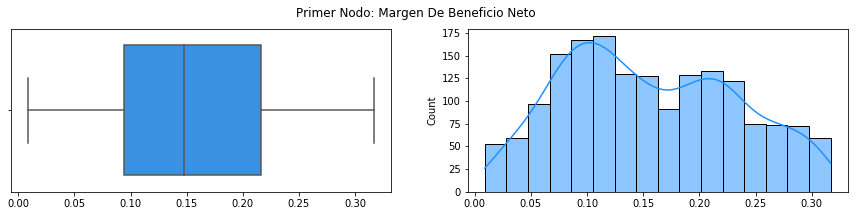

In [3]:
data1 = pd.read_excel("Data/MargenNeto.xlsx", index_col = [0])
data1 = dataframeToArray(data1)
boxAndHistPlot(data1, (15, 3), "dodgerblue", "Primer Nodo: Margen De Beneficio Neto")

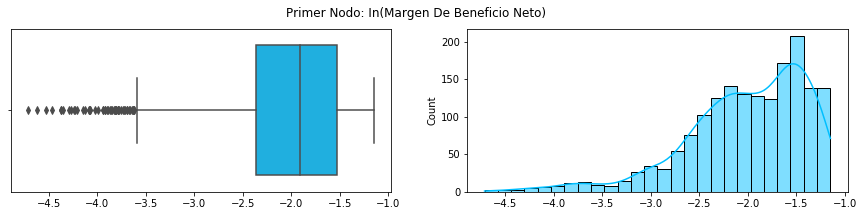

In [4]:
boxAndHistPlot(logTransformation(data1), (15, 3), "deepskyblue", "Primer Nodo: In(Margen De Beneficio Neto)")

+ Para este primer nodo que es el **Margen de Beneficio Neto**, observamos con el diagrama de caja que nuestros datos no presentan un sesgo considerable ni datos atípicos. Sin embargo, nos decidimos por hacer una transformación logarítmica a los mismos, pero ésta no presentó una mejora considerable en la distribución de los datos, ya que la empeora al generar valores atípicos que no se encontraban originalmente. Por esta razón decidimos trabajar con los datos originales para las siguientes secciones.

### 1.7.2 Ajuste De Distribuciones Hipotéticas


,MSE
gausshyper,0.997515
triang,1.09599
johnsonsb,1.12702
beta,1.16507
genexpon,1.23014


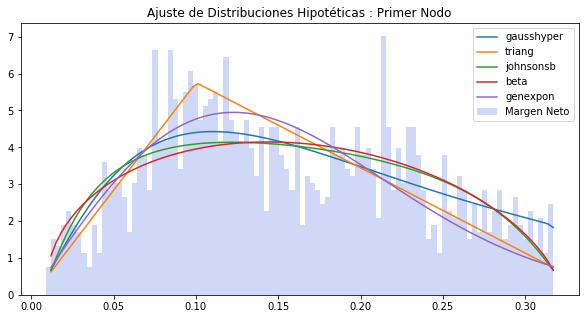

In [5]:
fitting1 = fittingHypotheticalDistributions(data1, "MSE", "Margen Neto", "royalblue", 
                                            "Ajuste de Distribuciones Hipotéticas : Primer Nodo", (10, 5))
fitting1

+ Primeramente ajustaremos numerosas distribuciones hipotéticas continuas que se encuentran disponibles en la paquetería `stats` de scipy a nuestros datos. Observamos que aquellas distribuciones que mejor se ajustan, de acuerdo a la métrica seleccionada de *error cuadrático medio*, son : *gausshyper, triang, johnsonsb, beta, genexpon*. A pesar de que estas son las distribuciones que mejor ajuste presentan a nuestros datos podemos observar claramente por el gráfico que no siguen del todo a los datos originales, pues nuestra distribución para el Margen Neto parece ser bimodal, atributo que no es capturado por ninguna de las distribuciones ajustadas. A continuación veremos las pruebas visuales y estadísticas para concluir de manera más certera si las distribuciones hipotéticas presentan o no un buen ajuste.

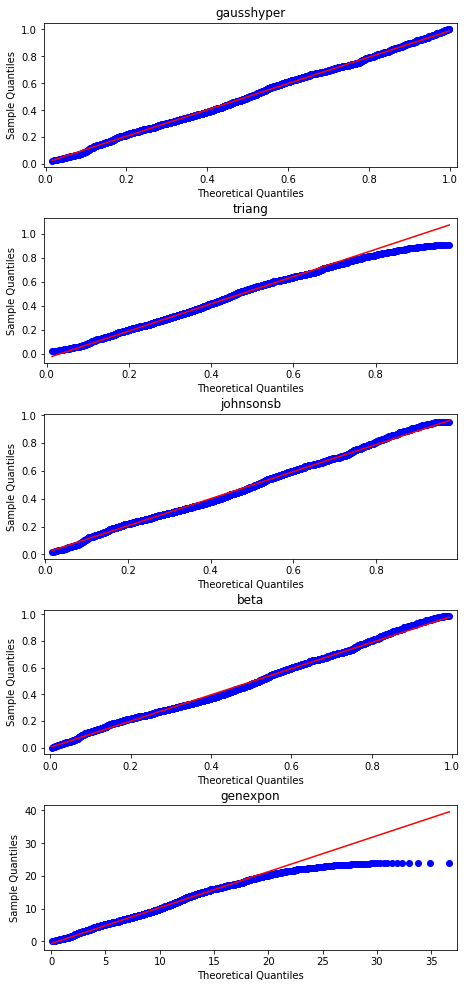

In [6]:
qqPlot(data1, fitting1, (7, 14))

+ De acuerdo a la prueba visual del **gráfico Q-Q** las distribuciones *gausshyper, johnsonsb, beta* son idénticas a nuestros datos, puesto que siguen muy de cerca la línea recta de $45º$, en otras palabras, la prueba visual nos dice que las estimaciones que provienen de las distribuciones ya mencionadas son iguales a los datos.

In [7]:
chiSquared_KolmogorovSmirnov(data1, fitting1)

,Valor P Prueba Chi-Cuadrada,Interpretación (1),Valor P Prueba Kolmogorov-Smirnov,Interpretación (2)
gausshyper,1.37559e-227,Se rechaza la hipótesis nula,0.234695,No se rechaza la hipótesis nula
triang,1.17876e-234,Se rechaza la hipótesis nula,4.09765e-07,Se rechaza la hipótesis nula
johnsonsb,5.14784e-229,Se rechaza la hipótesis nula,0.0371621,Se rechaza la hipótesis nula
beta,4.57708e-226,Se rechaza la hipótesis nula,0.0031031,Se rechaza la hipótesis nula
genexpon,2.65225e-235,Se rechaza la hipótesis nula,0.000108633,Se rechaza la hipótesis nula


+ Con la prueba visual es algo difícil obtener conclusiones, por eso efectuamos la prueba estadística de la Chi-Cuadrada y de Kolmogorov-Smirnov, ya que arrojan un *valor p* que puede ser contrastado con un nivel de significancia, dejando la interpretación a una métrica puramente cuantitativa. Tanto la Chi-Cuadrada como Kolmogorov-Smirnov efectúan una prueba de hipótesis sobre si los datos pueden ser modelados con las distribuciones propuestas. **Podemos concluir por los *valores p* arrojados que los datos no siguen las distribuciones propuestas ya que en la mayoría de los casos se rechaza la hipótesis nula (con un nivel de significancia propuesto del 5%)**. Cabe mencionar que en tan sólo un caso no se rechaza la hipótesis nula, en la prueba de Kolmogorov-Smirnov para la distribución *gausshpyer*, por lo que los datos podrían seguir a dicha distribución. Sin embargo, esto no nos convence porque, como ya habíamos mencionado, tal distribución no captura el atributo bimodal de los datos. **La alternativa que nos queda es estimar una densidad propia para nuestros datos con el método Kernel.**

### 1.7.3 KDE

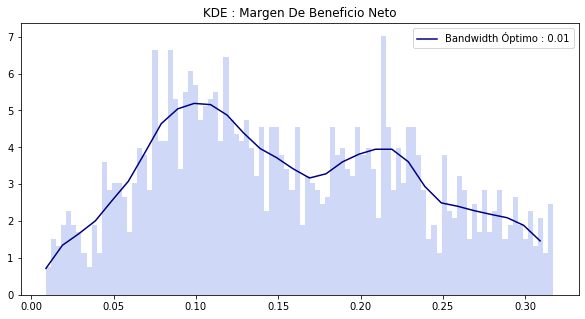

In [8]:
data1_min, data1_max = data1.min(), data1.max()
xgrid1 = np.arange(data1_min, data1_max, 0.01)
f_data1 = kde(data1, np.linspace(0.01, 2, 30), 20, xgrid1, "KDE : Margen De Beneficio Neto", color = ["navy", "royalblue"]);

+ Para la estimación de la función de densidad con el método del Kernel propusimos un espacio de búsqueda de $0.01$ a $2$ para el bandwidth. Al hacer la optimización llegamos a un bandwidth de $0.01$. **Observamos que la densidad ajustada por este método sí logra capturar el atributo bimodal de los datos**, lo cual es fenomenal. A continuación generaremos las variables aleatorias que distribuyen según esta función de densidad con ayuda del Método de Aceptación-Rechazo.

#### 1.7.3.1 Método De Aceptación-Rechazo

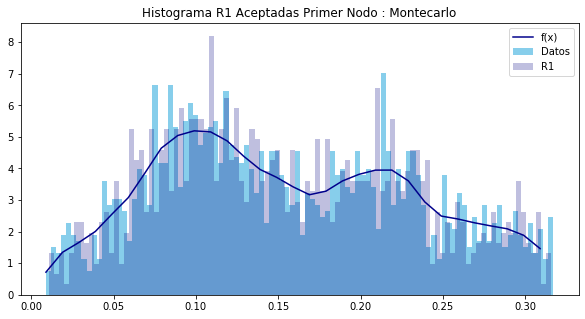

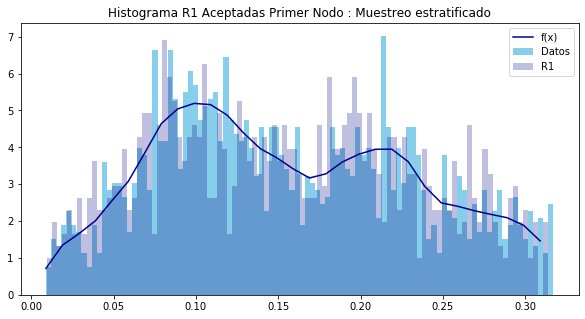

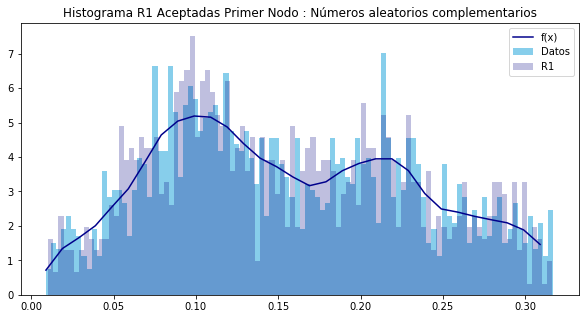

In [9]:
t1 = f_max(f_data1)
methods = ["Montecarlo", "Muestreo estratificado", "Números aleatorios complementarios"]
x_accepted1 = [acceptanceRejection(f_data1, t1, [data1_min, data1_max], 1000, method) for method in methods]

[acceptanceRejectionPlot(data1, x_accepted1[i], 100, f_data1, xgrid1, "Histograma R1 Aceptadas Primer Nodo : " + method, 
 (10, 5), ["darkblue", "skyblue", "navy"]) for i, method in zip(range(len(x_accepted1)), methods)];

+ Elaboramos tres variantes para el Método de Aceptación-Rechazo, la primera es con la técnica de Montecarlo Crudo y las dos siguientes con la técnica de Reducción de Varianza (Muestreo Estratificado y Números Aleatorios Complementarios). A nuestro juicio observamos que la técnica de **Muestreo Estratificado** es aquella que genera las mejores variables aleatorias que distribuyen según la función de densidad encontrada por el Kernel. A continuación generaremos $10000$ variables aleatorias con dicho método para nuestro primer nodo.

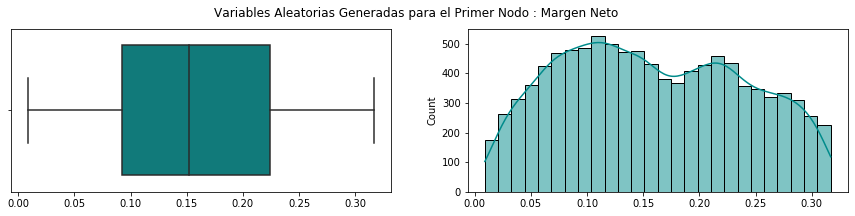

In [10]:
nodo1 = acceptanceRejection(f_data1, t1, [data1_min, data1_max], 10000, "Muestreo estratificado")
boxAndHistPlot(nodo1, (15, 3), "darkcyan", "Variables Aleatorias Generadas para el Primer Nodo : Margen Neto")

+ Las $10000$ variables aleatorias generadas parecen encontrarse dentro del dominio de los datos originales y seguir de forma bastante aproximada la distribución de estos, por lo que afirmamos que logramos simular con éxito este primer nodo.

In [11]:
confidenceInterval(nodo1, 0.95)

,Media,Límite inferior,Límite superior
Nivel de confianza : 95.0%,0.158745,0.157166,0.160324


+ Por último computamos un intervalo de confianza para la media de las variables aleatorias simuladas para este nodo. Tenemos que la media es de $15.87\%$, lo que significa que el sector financiero tiene en promedio un **Margen de Beneficio Neto del $15.87\%$**, esto quiere decir que por cada dólar en ventas una empresa financiera listada en el índice S&P $500$ se queda con $0.1587$ centavos de utilidad neta. De igual forma tenemos un intervalo de confianza para la media usando la distribución gaussiana, por lo que, con un nivel de confianza del $95\%$, podemos asegurar que la media del sector para el Margen Neto se encuentra entre $15.71\%$ y $16.03\%$. Como añadido podemos mencionar que este es un margen medio bastante alto, pues pocos sectores gozan de tan amplio nivel de utilidades con respecto a sus ventas generadas.

## 1.8 Segundo Nodo: Ratio Payout

### 1.8.1 Preprocesamiento De Datos

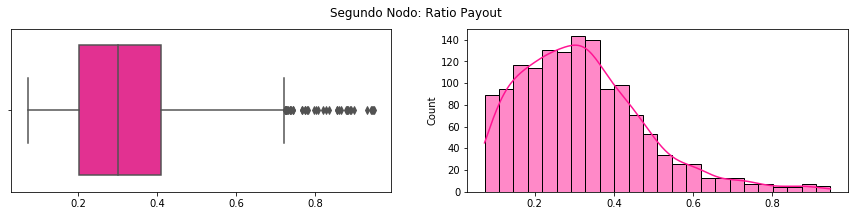

In [12]:
data2 = pd.read_excel("Data/RatioPayout.xlsx", index_col = [0])
data2 = dataframeToArray(data2)

boxAndHistPlot(data2, (15, 3), "deeppink", "Segundo Nodo: Ratio Payout")

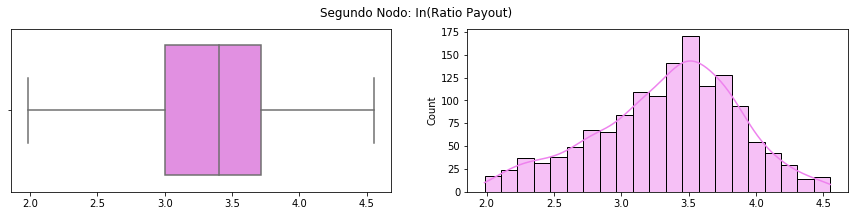

In [13]:
data2_log = logTransformation(data2 * 100)
boxAndHistPlot(data2_log, (15, 3), "violet", "Segundo Nodo: In(Ratio Payout)")

+ En la distribución de nuestros datos originales observamos valores atípicos por un evidente sesgo a la derecha. Esto también lo podemos comprobar en el diagrama de caja, puesto que existen datos extremos en esta misma sección. Por ello efectuamos una transformación logarítmica a nuestros datos y se observa que existe una notable mejora en la distribución porque se elimina el sesgo y los valores atípicos. Por esta razón trabajaremos con los datos transformados en la siguientes secciones.

### 1.8.2 Ajuste De Distribuciones Hipotéticas


,MSLE
burr,0.00515318
mielke,0.00515433
skewnorm,0.0053359
gompertz,0.00535164
genlogistic,0.00549117


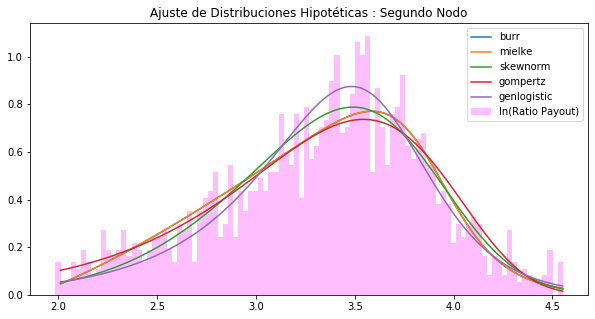

In [14]:
fitting2 = fittingHypotheticalDistributions(data2_log, "MSLE", "In(Ratio Payout)", "magenta", 
                                            "Ajuste de Distribuciones Hipotéticas : Segundo Nodo", (10, 5))
fitting2

+ Primeramente ajustaremos numerosas distribuciones hipotéticas continuas que se encuentran disponibles en la paquetería `stats` de scipy a nuestra segunda variable que hace referencia al **Ratio Payout** de las empresas de la industria financiera en el S&P $500$. Encontramos que aquellas distribuciones que mejor se ajustan, de acuerdo a la métrica seleccionada del **error logarítmico cuadrático medio**, son : *burr, mielke, skewnorm, gompertz, genlogistic*. A diferencia del nodo anterior (Margen Neto) las distribuciones ajustadas sí parecen capturar la forma de la distribución de nuestros datos. A continuación veremos las pruebas visuales y estadísticas para concluir de manera más certera si las distribuciones hipotéticas presentan o no un buen ajuste.

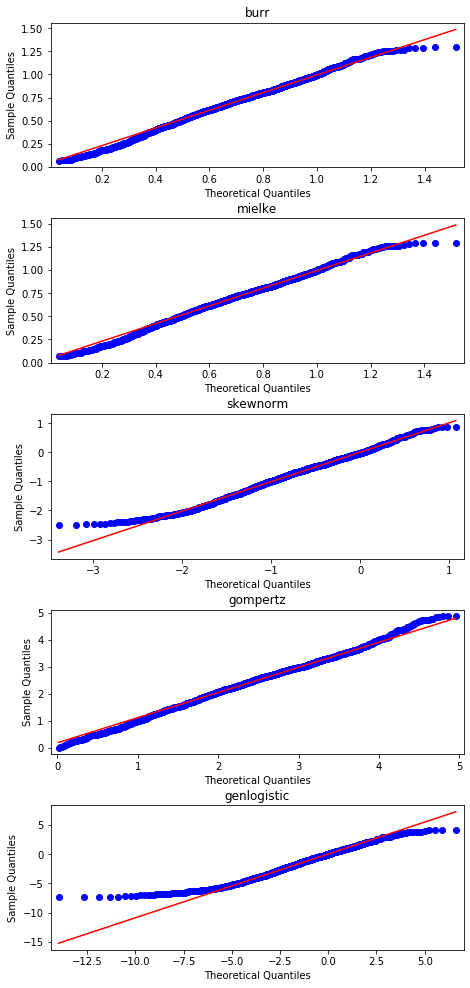

In [15]:
qqPlot(data2_log, fitting2, (7, 14))

+ Según la prueba visual hecha con los anteriores gráficos Q-Q la distribución **gompertz** es idéntica a nuestros datos, puesto que sigue muy de cerca la línea recta de $45º$, lo que significa que las estimaciones provenientes de esta distribución son bastante cercanas a nuestros datos. Al parecer las otras distribuciones quedarían descartadas porque en las colas se aprecia un desajuste considerable para nuestros datos. Comprobaremos la anterior afirmación mediante las pruebas de hipótesis.

In [16]:
chiSquared_KolmogorovSmirnov(data2_log, fitting2)

,Valor P Prueba Chi-Cuadrada,Interpretación (1),Valor P Prueba Kolmogorov-Smirnov,Interpretación (2)
burr,0.974031,No se rechaza la hipótesis nula,0.267536,No se rechaza la hipótesis nula
mielke,0.974064,No se rechaza la hipótesis nula,0.261627,No se rechaza la hipótesis nula
skewnorm,0.972288,No se rechaza la hipótesis nula,0.473443,No se rechaza la hipótesis nula
gompertz,0.970086,No se rechaza la hipótesis nula,0.272112,No se rechaza la hipótesis nula
genlogistic,0.97675,No se rechaza la hipótesis nula,0.118797,No se rechaza la hipótesis nula


+ Mediante la prueba estadística de la Chi-Cuadrada y Kolmogorov-Smirnov se efectúa una prueba de hipótesis sobre si los datos pueden ser modelados con las distribuciones propuestas. **Podemos concluir por los *valores p* arrojados que los datos sí siguen las distribuciones propuestas ya que en todos los casos no se rechaza la hipótesis nula (con un nivel de significancia propuesto del 5%)**. Debido a que la distribución **gompertz** pasa también la prueba visual Q-Q, la utilizaremos a continuación para la generación de variables aleatorias que distribuyan acorde a ésta.

#### 1.8.2.1 Método De La Transformada Inversa

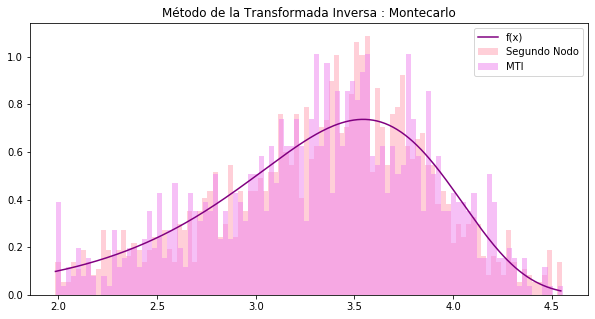

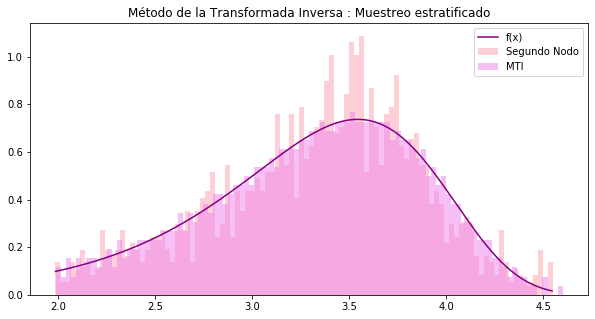

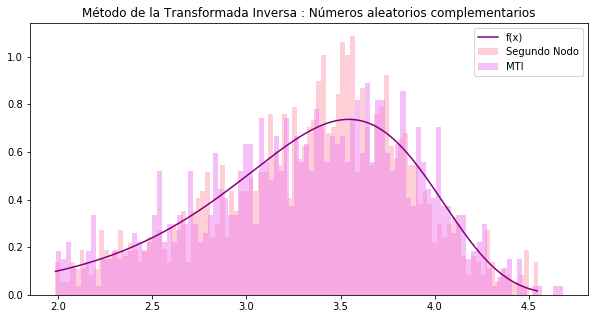

In [17]:
x2 = [inverseTransform(data2_log, 1000, "gompertz", method, "Segundo Nodo", ["pink", "purple", "violet"]) for method in methods]

+ Implementamos el **Método de la Transformada Inversa** para la generación de variables aleatorias que distribuyan según la función de densidad *gompertz* con el uso de las técnicas de Montecarlo, Muestreo estratificado y Números aleatorios complementarios. Observamos por los gráficos que la técnica que genera las mejores variables aleatorias, a nuestro juicio, es a través del **Muestreo Estratificado**. A pesar de ya tener las variables aleatorias generadas para este segundo nodo nos decidimos por elaborar la estimación de la función de densidad que ajuste a nuestros datos a través del método del Kernel para contrastar resultados.

### 1.8.3 KDE

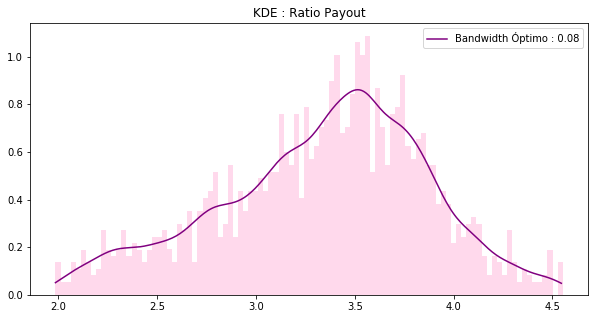

In [18]:
data2_min, data2_max = data2_log.min(), data2_log.max()
xgrid2 = np.arange(data2_min, data2_max, 0.01)
f_data2 = kde(data2_log, np.linspace(0.01, 2, 30), 20, xgrid2, "KDE : Ratio Payout", color = ["purple", "hotpink"]);

+ Se propone un espacio de búsqueda de $0.01$ a $2$ para encontrar el bandwidth óptimo con el método del Kernel. Mediante la optimización se obtiene un bandwidth de $0.08$. Observamos que la función de densidad generada con el Kernel ajusta de manera óptima a nuestros datos. A continuación generaremos las variables aleatorias que distribuyen según esta función de densidad con ayuda del Método de Aceptación-Rechazo.

#### 1.8.3.1 Método De Aceptación-Rechazo

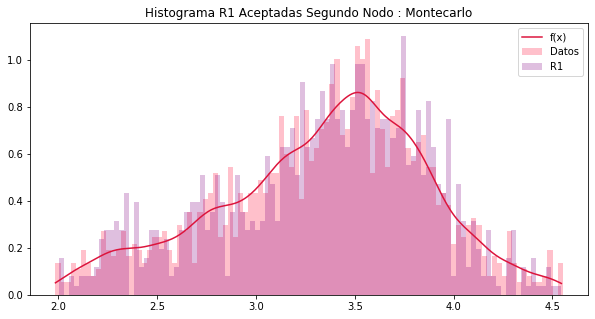

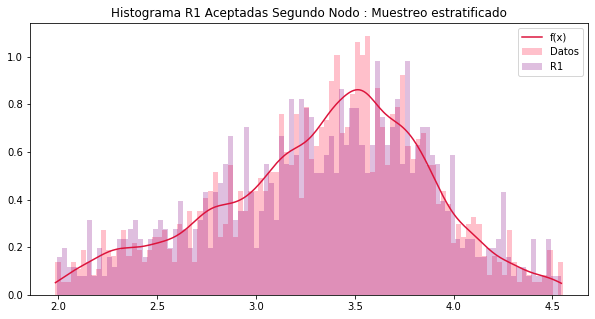

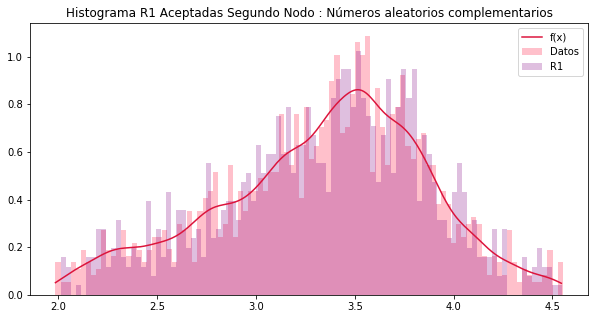

In [19]:
t2 = f_max(f_data2)
methods = ["Montecarlo", "Muestreo estratificado", "Números aleatorios complementarios"]
x_accepted2 = [acceptanceRejection(f_data2, t2, [data2_min, data2_max], 1000, method) for method in methods]

[acceptanceRejectionPlot(data2_log, x_accepted2[i], 100, f_data2, xgrid2, "Histograma R1 Aceptadas Segundo Nodo : " + method, 
 (10, 5), ["crimson", "pink", "purple"]) for i, method in zip(range(len(x_accepted2)), methods)];

+ Elaboramos tres variantes para el Método de Aceptación-Rechazo, la primera es con la técnica de Montecarlo Crudo y las dos siguientes con la técnica de Reducción de Varianza (Muestreo Estratificado y Números Aleatorios Complementarios). A nuestro juicio observamos que la técnica de **Muestreo Estratificado** es aquella que genera las mejores variables aleatorias que distribuyen según la función de densidad encontrada por el Kernel. 

+ En este punto nos resulta difícil hacer una selección de las variables aleatorias generadas para este nodo, ya que con el ajuste de distribuciones hipotéticas y el Kernel llegamos a resultados satisfactorios. **Generaremos $10000$ variables aleatorias a través de ambas metodologías con las especificaciones ya mencionadas para poder comparar resultados.** La primera metodología será la de la distribución *gompertz* con la técnica de Muestreo Estratificado y la segunda será la del Método de Aceptación-Rechazo con la técnica de Muestreo Estratificado. También es importante aclarar que las variables generadas serán transformadas, pues recordemos que originalmente sufrieron una transformación logarítmica.

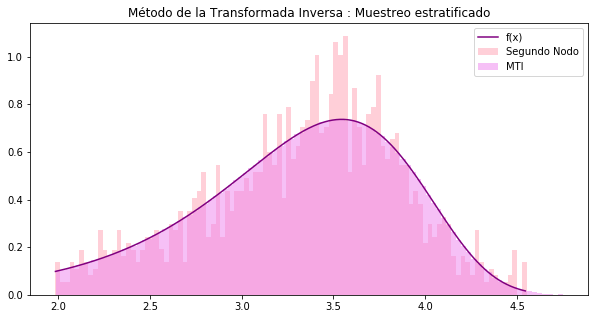

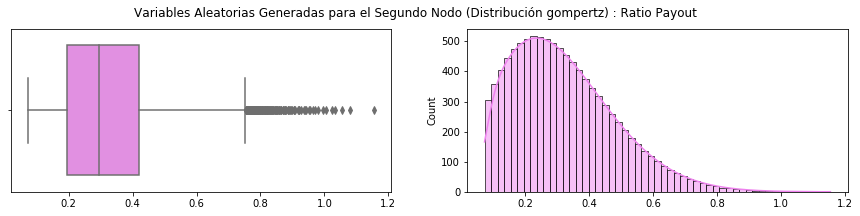

In [20]:
nodo2_a = np.exp(inverseTransform(data2_log, 10000, "gompertz", "Muestreo estratificado", "Segundo Nodo", 
                                  ["pink", "purple", "violet"])) / 100
boxAndHistPlot(nodo2_a, (15, 3), "violet", 
               "Variables Aleatorias Generadas para el Segundo Nodo (Distribución gompertz) : Ratio Payout")

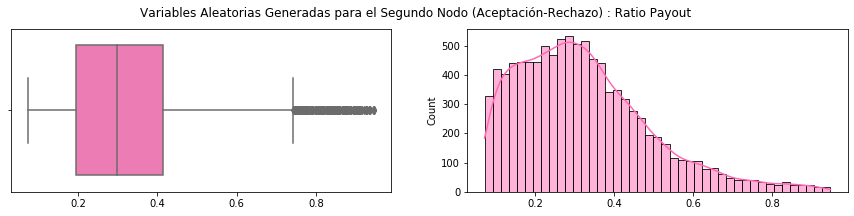

In [21]:
nodo2_b = np.exp(acceptanceRejection(f_data2, t2, [data2_min, data2_max], 10000, "Muestreo estratificado")) / 100
boxAndHistPlot(nodo2_b, (15, 3), "hotpink", 
               "Variables Aleatorias Generadas para el Segundo Nodo (Aceptación-Rechazo) : Ratio Payout")

+ Puede observarse claramente que **a través de la metodología de ajuste de distribuciones hipotéticas no se llega a resultados satisfactorios**, ya que **el método de la transformada inversa del paquete `stats` da como resultado algunas observaciones atípicas que salen del dominio de nuestros datos originales y que no tendrían sentido en la simulación de nuestro problema**, pues una compañía no puede repartir más dividendos de los ingresos que genera, es decir, no puede tener Ratios Payout mayores a $1$. 
+ **Sin embargo, la generación de variables aleatorias a través del Método Aceptación-Rechazo es exitosa**, pues éstas parecen seguir de forma fiel la distribución original y el dominio de las mismas hace sentido con nuestro proyecto, por lo que tales variables aleatorias son las seleccionadas.

In [22]:
confidenceInterval(nodo2_b, 0.95)

,Media,Límite inferior,Límite superior
Nivel de confianza : 95.0%,0.322659,0.31937,0.325948


+ Por último computamos un intervalo de confianza para la media de las variables aleatorias simuladas para este nodo. Tenemos que la media es de $32.26\%$, lo que significa que el sector financiero tiene en promedio un **Ratio Payout del $32.26\%$**, esto quiere decir que por cada dólar en utilidades una empresa financiera listada en el índice S&P $500$ reparte a los accionistas $0.3226$ centavos de dividendos. De igual forma tenemos un intervalo de confianza para la media usando la distribución gaussiana, por lo que, con un nivel de confianza del $95\%$, podemos asegurar que la media del sector para el Ratio Payout se encuentra entre $31.93\%$ y $32.59\%$. Como añadido podemos señalar que, por lo general, las empresas financieras suelen repartir más dividendos a sus socios accionistas que empresas de otros sectores, lo cual hace posible que tales firmas (las financieras) puedan ser valuadas a través del Modelo de Dividendos Descontados.

## 1.9 Tercer Nodo: Precio A Dividendos

### 1.9.1 Preprocesamiento De Datos

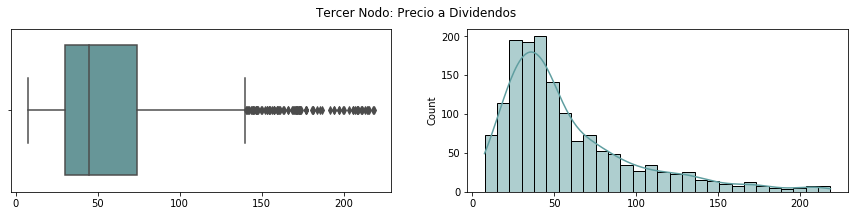

In [23]:
data3 = pd.read_excel("Data/PrecioDividendos.xlsx", index_col = [0])
data3 = dataframeToArray(data3)

boxAndHistPlot(data3, (15, 3), "cadetblue", "Tercer Nodo: Precio a Dividendos")

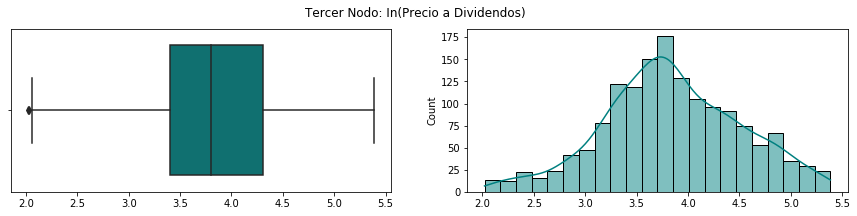

In [24]:
data3_log = logTransformation(data3)
boxAndHistPlot(data3_log, (15, 3), "teal", "Tercer Nodo: In(Precio a Dividendos)")

+ Puede observarse por el histograma que los datos de este tercer nodo, **Precio A Dividendos**, se encuentran sesgados a la izquierda, pues la distribución de probabilidad presenta valores extremos a la derecha (después del bigote máximo si se analiza el diagrama de caja y bigotes). Con ayuda de la transformación logarítmica de los datos se presenta una mejora considerable, puesto que se eliminan mayoritariamente los valores atípicos y el sesgo. Es por esto que en las próximas secciones trabajaremos con los datos transformados.

### 1.9.2 Ajuste De Distribuciones Hipotéticas


,MAE
genlogistic,0.0636634
recipinvgauss,0.0640968
invgamma,0.0643789
alpha,0.0645627
ncx2,0.0646675


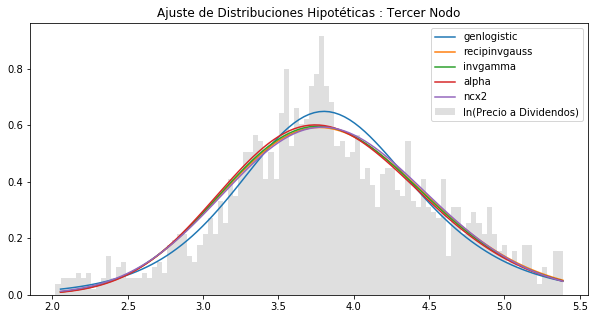

In [25]:
fitting3 = fittingHypotheticalDistributions(data3_log, "MAE", "In(Precio a Dividendos)", "gray", 
                                            "Ajuste de Distribuciones Hipotéticas : Tercer Nodo", (10, 5))
fitting3

+ Primeramente ajustaremos numerosas distribuciones hipotéticas continuas que se encuentran disponibles en la paquetería `stats` de scipy. En este nodo se decide por emplear la métrica del **error absoluto medio** para encontrar aquellas distribuciones que mejor se ajustan a nuestros datos. De acuerdo a tal métrica las distribuciones con menor error de ajuste son : *genlogistic, recipinvgauss, invgamma, alpha, ncx2*. Parece que dichas distribuciones logran capturar medianamente bien la forma de la distribución de los datos. Ahora veremos las pruebas visuales y estadísticas para concluir de forma más precisa si las distribuciones hipotéticas nombradas anteriormente presentan o no un buen ajuste.

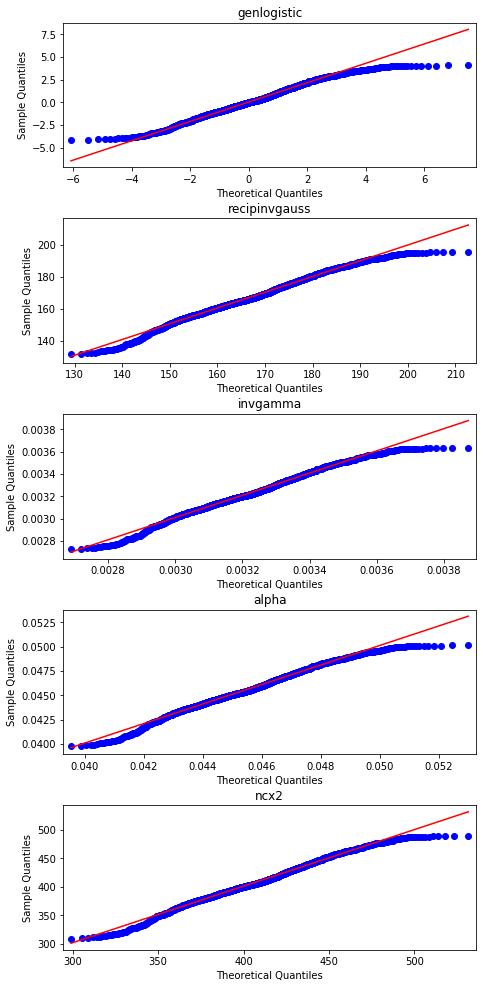

In [26]:
qqPlot(data3_log, fitting3, (7, 14))

+ En cuanto al primer gráfico Q-Q podemos observar un claro desajuste en las colas. En la cola derecha tenemos menos valores de los esperados si en verdad proviniesen de la distribución **genlogistic**, mientras que en la cola izquierda tenemos más valores de los esperados si en verdad viniesen de dicha distribución. Es por esto que la distribución *genlogistic*, de acuerdo a la prueba visual, *parece no ser la más indicada para modelar a nuestros datos*.

+ En cuanto a los otros gráficos Q-Q podemos observar que son bastante similares, pues todos tienen un evidente desajuste en la cola derecha. Esto significa que hay menos valores de los esperados en tal cola si en verdad viniesen de tales distribuciones (*recipinvgauss, invgamma, alpha, ncx2*). Parece que estas distribuciones *tampoco son del todo adecuadas para modelar a nuestros datos, sin embargo son mejor opción que genlogistic, claro está.* A continuación comprobaremos los ajustes de todas estas distribuciones mediante las pruebas de hipótesis.

In [27]:
chiSquared_KolmogorovSmirnov(data3_log, fitting3)

,Valor P Prueba Chi-Cuadrada,Interpretación (1),Valor P Prueba Kolmogorov-Smirnov,Interpretación (2)
genlogistic,0.985238,No se rechaza la hipótesis nula,0.254973,No se rechaza la hipótesis nula
recipinvgauss,0.982066,No se rechaza la hipótesis nula,0.305644,No se rechaza la hipótesis nula
invgamma,0.982455,No se rechaza la hipótesis nula,0.280301,No se rechaza la hipótesis nula
alpha,0.982886,No se rechaza la hipótesis nula,0.165285,No se rechaza la hipótesis nula
ncx2,0.981713,No se rechaza la hipótesis nula,0.231637,No se rechaza la hipótesis nula


+ Mediante la prueba estadística de la Chi-Cuadrada y Kolmogorov-Smirnov se efectúa una prueba de hipótesis sobre si los datos pueden ser modelados con las distribuciones propuestas. **Podemos concluir por los *valores p* arrojados que los datos sí siguen las distribuciones propuestas ya que en todos los casos no se rechaza la hipótesis nula (con un nivel de significancia propuesto del 5%)**. Para la selección de la distribución que modelará a nuestros datos optamos por **recipinvgauss**, pues ésta también pertenece al conjunto de distribuciones que establecimos como mejor opción (recordemos que su gráfico Q-Q sólo da indicios de desajuste en la cola derecha); y dentro de este conjunto es la que menor *MAE* presenta. A continuación generaremos variables aleatorias que distribuyan acorde a ésta.

#### 1.9.2.1 Método De La Transformada Inversa

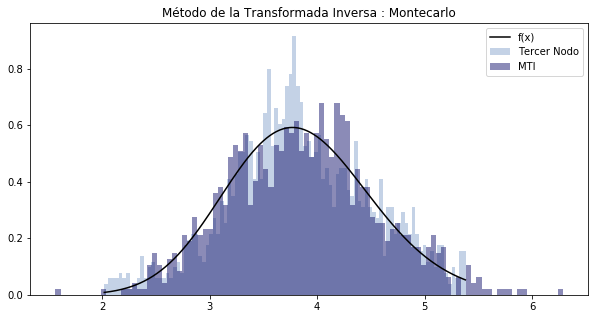

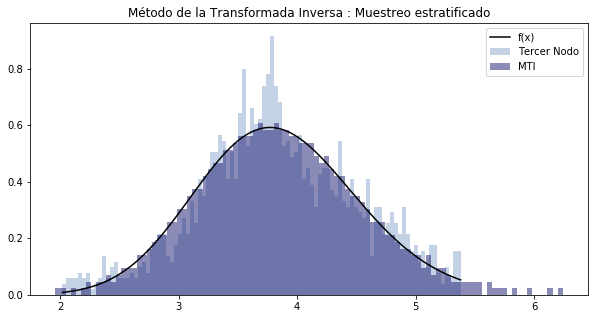

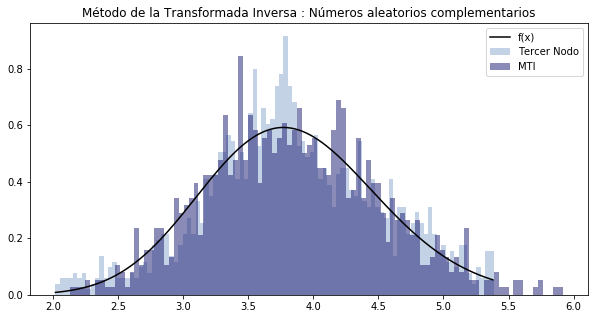

In [28]:
x3 = [inverseTransform(data3_log, 1000, "recipinvgauss", method, "Tercer Nodo", ["lightsteelblue", "k", "midnightblue"]) 
      for method in methods]

+ Implementamos el **Método de la Transformada Inversa** para la generación de variables aleatorias que distribuyan según la función de densidad *recipinvgauss* con el uso de las técnicas de Montecarlo, Muestreo estratificado y Números aleatorios complementarios. Observamos por los gráficos que la técnica que genera las mejores variables aleatorias, a nuestro juicio, es a través del **Muestreo Estratificado**. A pesar de ya tener las variables aleatorias generadas para este nodo nos decidimos por elaborar la estimación de la función de densidad que ajuste a nuestros datos a través del método del Kernel para contrastar resultados.

### 1.9.3 KDE

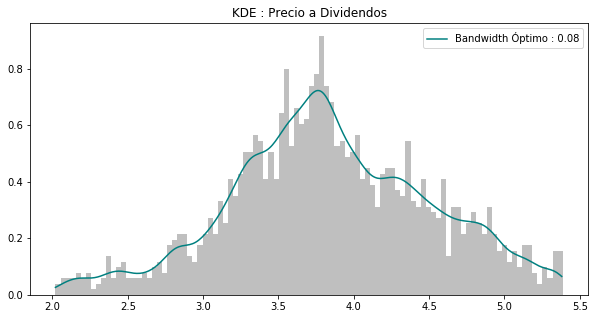

In [29]:
data3_min, data3_max = data3_log.min(), data3_log.max()
xgrid3 = np.arange(data3_min, data3_max, 0.01)
f_data3 = kde(data3_log, np.linspace(0.01, 2, 30), 20, xgrid3, "KDE : Precio a Dividendos", color = ["teal", "k"]);

+ Se propone un espacio de búsqueda de $0.01$ a $2$ para encontrar el bandwidth óptimo con el método del Kernel. Mediante la optimización, y al igual que en el nodo anterior, se obtiene un bandwidth de $0.08$. Podemos observar que la función de densidad generada a través del Método del Kernel parece seguir de manera más fiel a la distribución de nuestros datos. Resta generar las variables aleatorias que distribuyan según esta función de densidad con ayuda del Método de Aceptación-Rechazo.

#### 1.9.3.1 Método De Aceptación-Rechazo

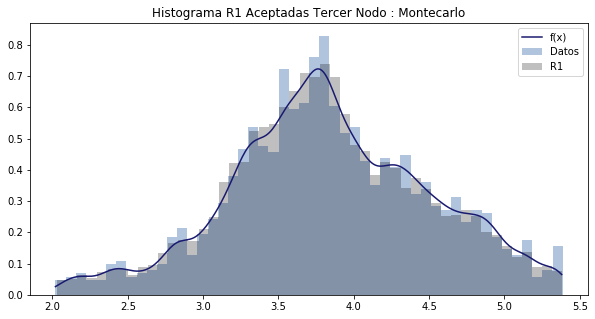

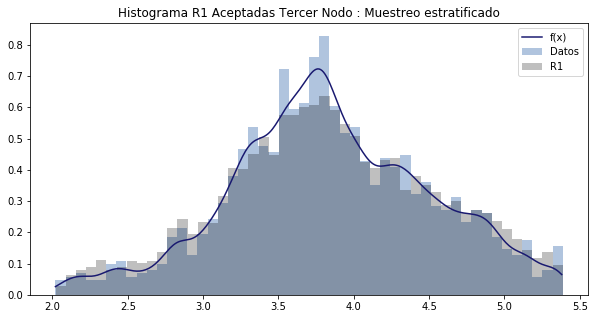

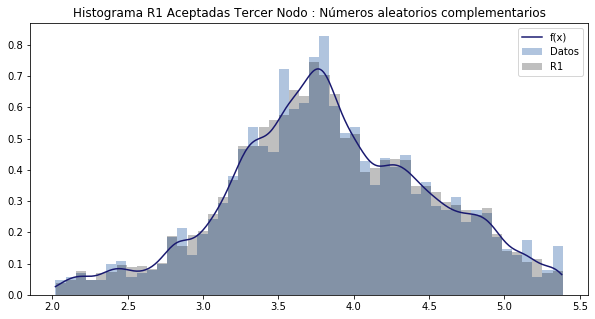

In [30]:
t3 = f_max(f_data3)
methods = ["Montecarlo", "Muestreo estratificado", "Números aleatorios complementarios"]
x_accepted3 = [acceptanceRejection(f_data3, t3, [data3_min, data3_max], 10000, method) for method in methods]

[acceptanceRejectionPlot(data3_log, x_accepted3[i], 50, f_data3, xgrid3, "Histograma R1 Aceptadas Tercer Nodo : " + method, 
 (10, 5), ["midnightblue", "lightsteelblue", "k"]) for i, method in zip(range(len(x_accepted3)), methods)];

+ Es necesario hacer hincapié en que efectuamos tres variantes para el Método de Aceptación-Rechazo, siendo la primera a través de la técnica de Montecarlo Crudo y las restantes con la técnica de Reducción de Varianza. A juicio personal, y contra todo pronóstico, nos parece que la técnica de **Montecarlo Crudo** es aquella que genera las mejores variables aleatorias que distribuyen según la función de densidad encontrada con el Kernel.

+ Al igual que en el nodo anterior nos resulta difícil hacer una selección de las variables aleatorias generadas, ya que, a través de ambas metodologías (distribuciones teóricas y método del Kernel) llegamos a resultados satisfactorios. Es por esto que **generaremos $10000$** variables aleatorias a través de ambas metodologías con las especificaciones óptimas mencionadas previamente para contrastar resultados. La primera metodología será la de la distribución *recipinvgauss* con la técnica de Muestreo Estratificado y la segunda será la del Método de Aceptación-Rechazo con la técnica de Montecarlo Crudo. Por último es importante aclarar que las variables aleatorias generadas serán transformadas de vuelta a su espacio original. 

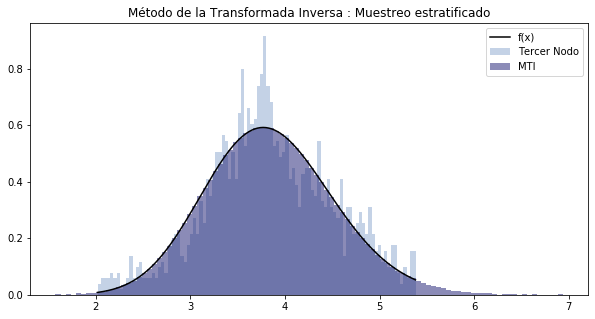

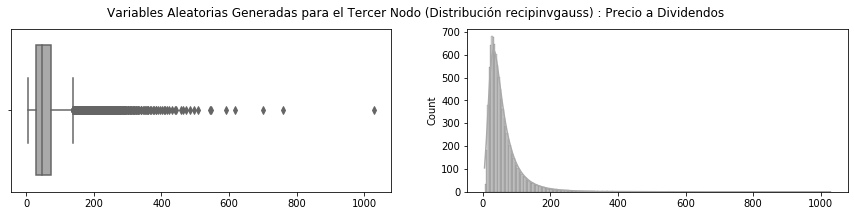

In [31]:
nodo3_a = np.exp(inverseTransform(data3_log, 10000, "recipinvgauss", "Muestreo estratificado", "Tercer Nodo", 
                                  ["lightsteelblue", "k", "midnightblue"]))
boxAndHistPlot(nodo3_a, (15, 3), "darkgrey", 
               "Variables Aleatorias Generadas para el Tercer Nodo (Distribución recipinvgauss) : Precio a Dividendos")

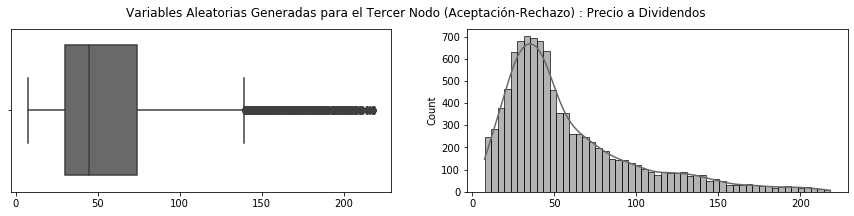

In [32]:
nodo3_b = np.exp(acceptanceRejection(f_data3, t3, [data3_min, data3_max], 10000, "Montecarlo"))
boxAndHistPlot(nodo3_b, (15, 3), "dimgrey", 
               "Variables Aleatorias Generadas para el Tercer Nodo (Aceptación-Rechazo) : Precio a Dividendos")

+ Puede observarse claramente que **a través de la metodología de ajuste de distribuciones hipotéticas no se llega a resultados satisfactorios**, ya que nuevamente **el método de la transformada inversa del paquete `stats` da como resultado algunas observaciones atípicas que salen del dominio de nuestros datos originales**.
+ **Por fortuna, la generación de variables aleatorias a través del Método Aceptación-Rechazo es exitosa**, pues éstas siguen de forma más fiel la distribución original y se encuentran dentro del dominio de los datos originales; por lo que tales variables aleatorias son las seleccionadas.

In [33]:
confidenceInterval(nodo3_b, 0.95)

,Media,Límite inferior,Límite superior
Nivel de confianza : 95.0%,57.980574,57.187785,58.773363


+ Por último computamos un intervalo de confianza para la media de las variables aleatorias simuladas para este nodo. Tenemos que la media es de $57.98$, lo que significa que en el sector financiero los inversores suelen pagar, de media, $57.98$ dólares por cada dólar de dividendos que se reparten. Tal múltiplo nos ayudará posteriormente a determinar el valor terminal de la firma que estemos valuando. De igual forma tenemos un intervalo de confianza para la media usando la distribución gaussiana, por lo que, con un nivel de confianza del $95\%$, podemos asegurar que la media del sector para el Múltiplo Precio A Dividendos se encuentra entre $57.18$ y $58.77$. 

## 1.10 Cuarto Nodo: Beta

### 1.10.1 Preprocesamiento De Datos

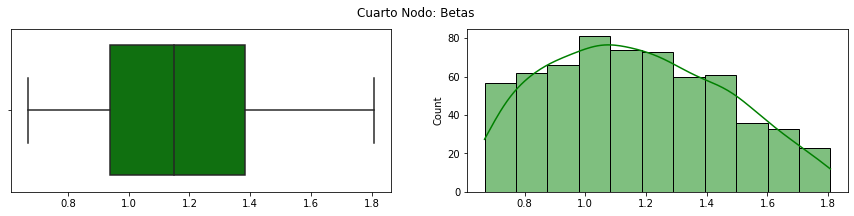

In [34]:
data4 = pd.read_excel("Data/Betas.xlsx", index_col = [0])
data4 = dataframeToArray(data4)

boxAndHistPlot(data4, (15, 3), "green", "Cuarto Nodo: Betas")

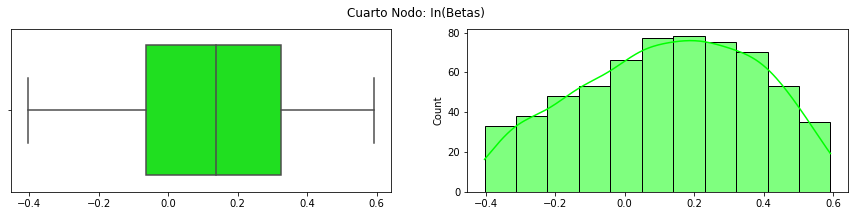

In [35]:
data4_log = logTransformation(data4)
boxAndHistPlot(data4_log, (15, 3), "lime", "Cuarto Nodo: In(Betas)")

+ Primeramente se obtiene un diagrama de caja y bigotes así como un histograma para los datos del cuarto nodo, **Beta**. El primer visual nos indica que no se encuentran valores atípicos o extremos. Además, la distribución de nuestros datos no presenta un sesgo considerable. De todas formas decidimos elaborar una transformación logarítmica a los datos para observar si existe un cambio notable. Como es de esperarse, al no tener valores atípicos ni sesgo considerable en la distribución original, la transformación no es de gran utilidad. Es por ello que en los siguientes apartados trabajaremos con los datos sin transformar.

### 1.10.2 Ajuste De Distribuciones Hipotéticas


,MSE
genhalflogistic,0.12777
beta,0.12885
gausshyper,0.128889
exponweib,0.128905
gengamma,0.129225


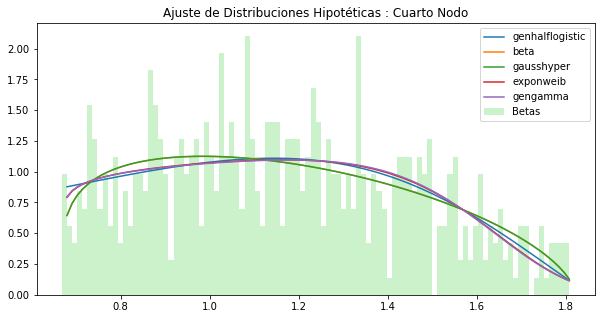

In [36]:
fitting4 = fittingHypotheticalDistributions(data4, "MSE", "Betas", "limegreen", 
                                            "Ajuste de Distribuciones Hipotéticas : Cuarto Nodo", (10, 5))
fitting4

+ Primeramente ajustaremos numerosas distribuciones hipotéticas continuas que se encuentran disponibles en la paquetería `stats` de scipy. En este nodo se decide por emplear la métrica del **error medio cuadrático** para encontrar aquellas distribuciones que mejor se ajustan a nuestros datos. De acuerdo a tal métrica las distribuciones con menor error de ajuste son : *genhalflogistic, beta, gausshyper, exponweib, gengamma*. Dichas distribuciones logran capturar de manera regular la forma de la distribución de los datos. Ahora veremos las pruebas visuales y estadísticas para concluir de forma más precisa si las distribuciones hipotéticas nombradas anteriormente presentan o no un buen ajuste.

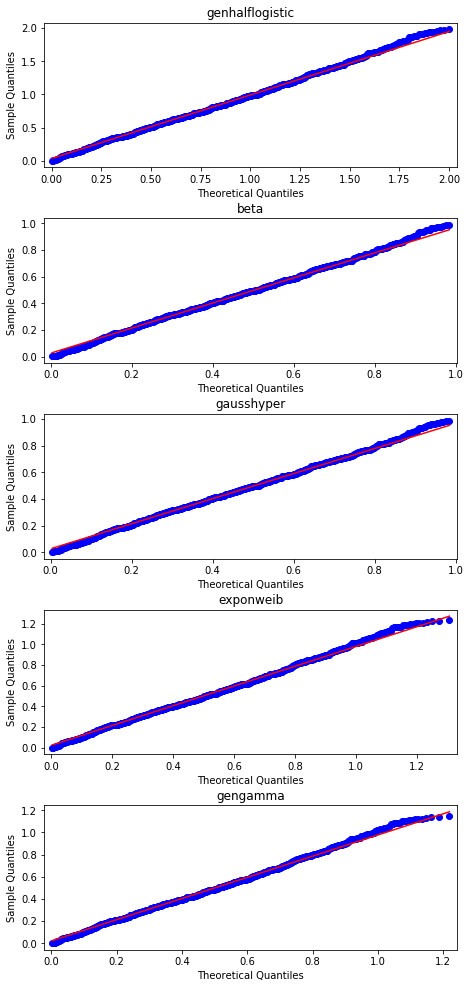

In [37]:
qqPlot(data4, fitting4, (7, 14))

+ En cuanto a los tres primeros gráficos Q-Q podemos concluir que los datos sí parecen provenir de las distribuciones *genhalflogistic, beta y gausshyper*, puesto que la línea azul sigue muy de cerca a la línea de $45º$. Tal parecer que *estas distribuciones son las indicadas para modelar a nuestros datos*.

+ En cuanto a los últimos dos gráficos Q-Q podemos observar que son bastante similares, pues tienen un pequeño pero claro desajuste en la cola derecha. Esto significa que hay menos valores de los esperados en tal cola si en verdad viniesen de las distribuciones *exponweib y gengamma*. Parece que éstas *no son del todo adecuadas para modelar a nuestros datos.* A continuación comprobaremos los ajustes de todas estas distribuciones mediante las pruebas de hipótesis.

In [38]:
chiSquared_KolmogorovSmirnov(data4, fitting4)

,Valor P Prueba Chi-Cuadrada,Interpretación (1),Valor P Prueba Kolmogorov-Smirnov,Interpretación (2)
genhalflogistic,1,No se rechaza la hipótesis nula,0.812783,No se rechaza la hipótesis nula
beta,1,No se rechaza la hipótesis nula,0.905423,No se rechaza la hipótesis nula
gausshyper,1,No se rechaza la hipótesis nula,0.905095,No se rechaza la hipótesis nula
exponweib,1,No se rechaza la hipótesis nula,0.743014,No se rechaza la hipótesis nula
gengamma,1,No se rechaza la hipótesis nula,0.709266,No se rechaza la hipótesis nula


+ Mediante la prueba estadística de la Chi-Cuadrada y Kolmogorov-Smirnov se efectúa una prueba de hipótesis sobre si los datos pueden ser modelados con las distribuciones propuestas. **Podemos concluir por los *valores p* arrojados que los datos sí siguen las distribuciones propuestas ya que en todos los casos no se rechaza la hipótesis nula (con un nivel de significancia propuesto del 5%)**. Para la selección de la distribución que modelará a nuestros datos optamos por **genhalflogistic**, pues ésta pertenece al conjunto de distribuciones que establecimos como mejor opción para modelar a nuestros datos y dentro de este conjunto es la que menor *MSE* presenta. A continuación generaremos variables aleatorias que distribuyan acorde a ésta.

#### 1.10.2.1 Método De La Transformada Inversa

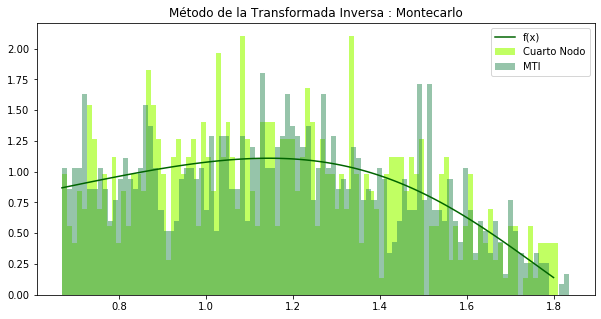

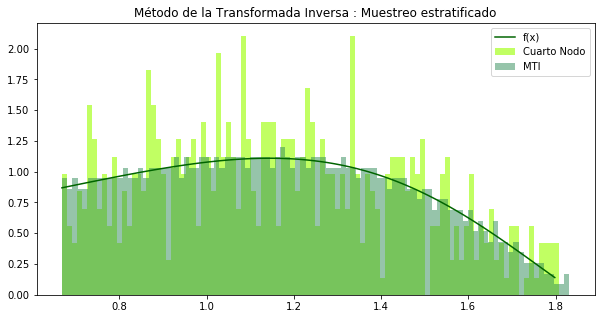

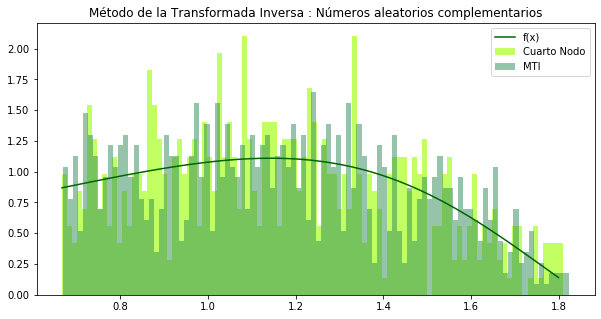

In [39]:
x4 = [inverseTransform(data4, 1000, "genhalflogistic", method, "Cuarto Nodo", ["greenyellow", "darkgreen", "seagreen"]) 
      for method in methods]

+ Implementamos el **Método de la Transformada Inversa** para la generación de variables aleatorias que distribuyan según la función de densidad *genhalflogistic* con el uso de las técnicas de Montecarlo, Muestreo estratificado y Números aleatorios complementarios. Observamos por los gráficos que la técnica que genera las mejores variables aleatorias, a nuestro juicio, es a través del **Muestreo Estratificado**. A pesar de ya tener las variables aleatorias generadas para este nodo nos decidimos por elaborar la estimación de la función de densidad que ajuste a nuestros datos a través del método del Kernel para contrastar resultados.

### 1.10.3 KDE

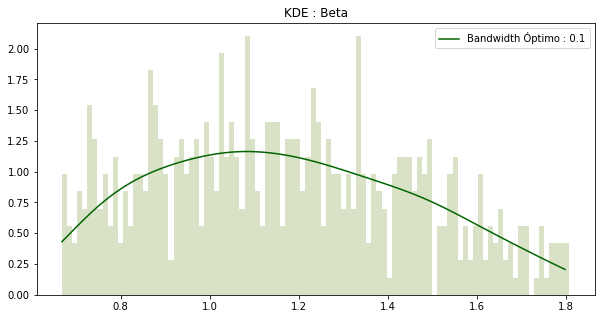

In [40]:
data4_min, data4_max = data4.min(), data4.max()
xgrid4 = np.arange(data4_min, data4_max, 0.01)
f_data4 = kde(data4, np.linspace(0.1, 2, 30), 20, xgrid4, "KDE : Beta", color = ["darkgreen", "olivedrab"]);

+ Se propone un espacio de búsqueda de $0.1$ a $2$ para encontrar el bandwidth óptimo con el método del Kernel. Mediante la optimización se obtiene un bandwidth de $0.1$. Podemos observar que la función de densidad generada a través de esta metodología es muy similar a las distribuciones hipotéticas ajustadas previamente. Resta generar las variables aleatorias que distribuyan según esta función de densidad con ayuda del Método de Aceptación-Rechazo.

#### 1.10.3.1 Método De Aceptación-Rechazo

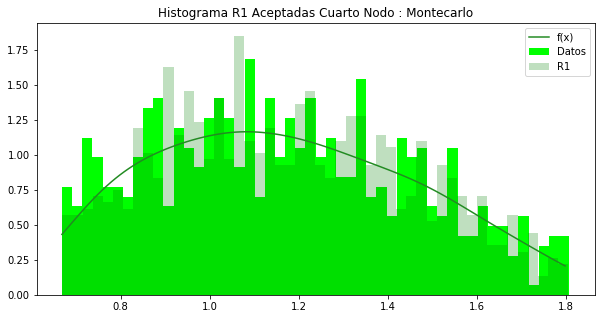

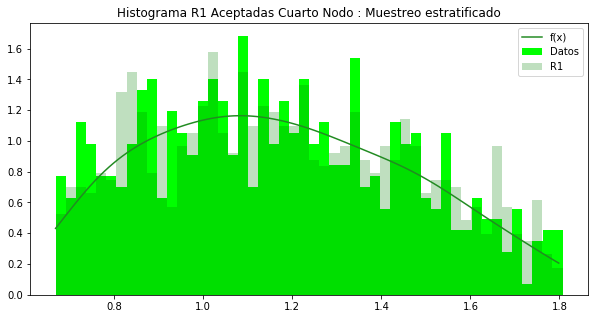

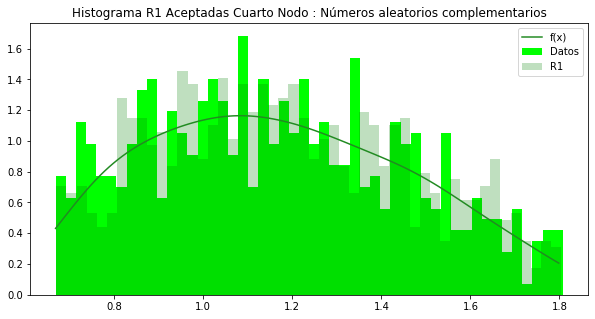

In [41]:
t4 = f_max(f_data4)
methods = ["Montecarlo", "Muestreo estratificado", "Números aleatorios complementarios"]
x_accepted4 = [acceptanceRejection(f_data4, t4, [data4_min, data4_max], 1000, method) for method in methods]

[acceptanceRejectionPlot(data4, x_accepted4[i], 50, f_data4, xgrid4, "Histograma R1 Aceptadas Cuarto Nodo : " + method, 
 (10, 5), ["forestgreen", "lime", "green"]) for i, method in zip(range(len(x_accepted4)), methods)];

+ Efectuamos tres variantes para el Método de Aceptación-Rechazo, siendo la primera a través de la técnica de Montecarlo Crudo y las restantes con la técnica de Reducción de Varianza. Es necesario aclarar que ninguna técnica sobresale, pero el éxito previo del **Muestreo Estratificado** nos obliga a seleccionarla para generar variables aleatorias que distribuyan según la función de densidad encontrada con el Kernel.

+ Generaremos $10000$ variables aleatorias a través de ambas metodologías (método de la transformada inversa y método de aceptación-rechazo) con las especificaciones óptimas mencionadas previamente para contrastar resultados. La primera metodología será la de la distribución *genhalflogistic* con la técnica de Muestreo Estratificado y la segunda será la del Método de Aceptación-Rechazo con la técnica de Muestreo Estratificado.

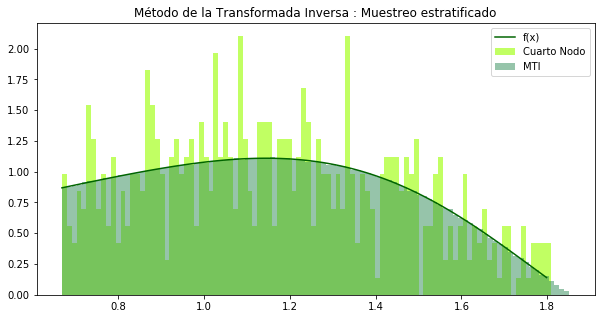

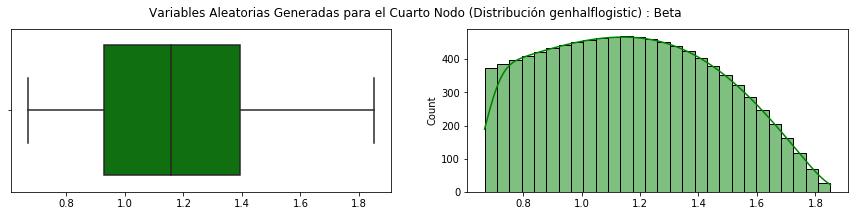

In [42]:
nodo4_a = (inverseTransform(data4, 10000, "genhalflogistic", "Muestreo estratificado", "Cuarto Nodo", 
                                  ["greenyellow", "darkgreen", "seagreen"]))
boxAndHistPlot(nodo4_a, (15, 3), "green", 
               "Variables Aleatorias Generadas para el Cuarto Nodo (Distribución genhalflogistic) : Beta")

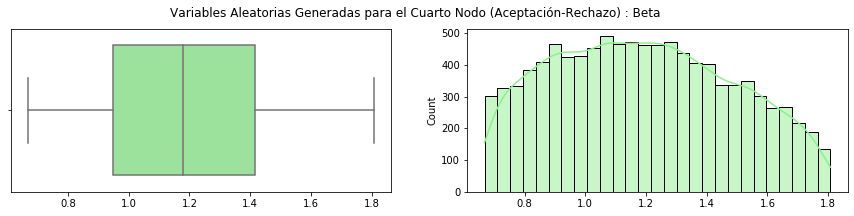

In [43]:
nodo4_b = (acceptanceRejection(f_data4, t4, [data4_min, data4_max], 10000, "Muestreo estratificado"))
boxAndHistPlot(nodo4_b, (15, 3), "lightgreen", 
               "Variables Aleatorias Generadas para el Cuarto Nodo (Aceptación-Rechazo) : Beta")

+ Puede observarse claramente que **a través de la metodología de ajuste de distribuciones hipotéticas no se llega a resultados satisfactorios**, ya que nuevamente **el método de la transformada inversa del paquete `stats` da como resultado algunas observaciones atípicas que salen del dominio de nuestros datos originales**.

+ **Sin embargo, la generación de variables aleatorias a través del Método Aceptación-Rechazo es exitosa**, pues éstas siguen de manera más fiel a la distribución original y se encuentran dentro del dominio de los datos originales; por lo que tales variables aleatorias son las seleccionadas.

In [44]:
confidenceInterval(nodo4_b, 0.95)

,Media,Límite inferior,Límite superior
Nivel de confianza : 95.0%,1.190746,1.184998,1.196494


+ Por último computamos un intervalo de confianza para la media de las variables aleatorias simuladas para este nodo. Tenemos que la media es de $1.1907$, lo que significa que en el sector financiero las acciones presentan un movimiento ligeramente mayor respecto al mercado en general. De igual forma tenemos un intervalo de confianza para la media usando la distribución gaussiana, por lo que, con un nivel de confianza del $95\%$, podemos asegurar que la media del sector para la Beta se encuentra entre $1.1849$ y $1.1964$.

## 1.11 Valoración

### 1.11.1 T. Rowe Price 

<img src = "https://seekvectorlogo.net/wp-content/uploads/2018/09/t-rowe-price-vector-logo.png" width = "600px" height = "250px" /> 


### 1.11.2 Aflac Inc.

<img src = "https://www.jmu.edu/humanresources/benefits/aflac/aflca.jpeg" width = "600px" height = "250px" /> 


## 1.12 Conclusiones

## 1.13 Referencias Consultadas